## 1 Transforming Data With Pandas


### 1.1 Introduction

In this lesson, we'll continue working with the [World Happiness Report](https://www.kaggle.com/unsdsn/world-happiness) and explore another aspect of it that we haven't analyzed yet - the factors that contribute happiness. As a reminder, the World Happiness Report assigns each country a happiness score based on a poll question that asks respondents to rank their life on a scale of 0 - 10.

You may recall from previous lessons that each of the columns below contains the estimated extent to which each factor contributes to the happiness score:

- Economy (GDP per Capita)
- Family
- Health (Life Expectancy)
- Freedom
- Trust (Government Corruption)
- Generosity

Throughout this lesson, we'll refer to the columns above as the "factor" columns. We'll work to answer the following question in this lesson:

- Which of the factors above contribute the most to the happiness score?

However, in order to answer this question, we need to manipulate our data into a format that makes it easier to analyze. We'll explore the following functions and methods to perform this task:

- Series.map()
- Series.apply()
- DataFrame.applymap()
- DataFrame.apply()
- pd.melt()

For teaching purposes, we'll focus just on the 2015 report in this mission. As a reminder, below are the first five rows of the data set:


| | Country | Region | Happiness Rank | Happiness Score | Standard Error | Economy | Family | Health| Freedom | Trust  | 
|---------|-------------|----------------|-----------------|----------------|--------------------------|---------|--------------------------|---------|-------------------------------|------------|
| 0 | Switzerland | Western Europe | 1 | 7.587 | 0.03411 | 1.39651 | 1.34951 | 0.94143 | 0.66557 | 0.41978 |
| 1 | Iceland | Western Europe | 2 | 7.561 | 0.04884 | 1.30232 | 1.40223 | 0.94784 | 0.62877 | 0.14145 |
| 2 | Denmark | Western Europe | 3 | 7.527 | 0.03328 | 1.32548 | 1.36058 | 0.87464 | 0.64938 | 0.48357 |
| 3 | Norway | Western Europe | 4 | 7.522 | 0.03880 | 1.45900 | 1.33095 | 0.88521 | 0.66973 | 0.36503 |
| 4 | Canada | North America | 5 | 7.427 | 0.03553 | 1.32629 | 1.32261 | 0.90563 | 0.63297 | 0.32957 |


Below are descriptions for some of the other columns we'll work with in this lesson:

- **Country** - Name of the country
- **Region** - Name of the region the country belongs to
- **Happiness Rank** - The rank of the country, as determined by its happiness score
- **Happiness Score** - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10
- **Dystopia Residual** - Represents the extent to which the factors above over or under explain the happiness score. Don't worry too much about this column - you won't need in depth knowledge of it to complete this lesson.

Let's start by renaming some of the columns in **happiness2015**.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


Recall that the 2015 World Happiness Report is saved to a variable named **happiness2015**. We also created a dictionary named **mapping** for renaming columns.

- Use the DataFrame.rename() method to change the 'Economy (GDP per Capita)', 'Health (Life Expectancy)', and 'Trust (Government Corruption)' column names to the names specified in the **mapping** dictionary.
- Pass the **mapping** dictionary into the df.rename() method and set the axis parameter to 1.
- Assign the result back to **happiness2015**.



In [1]:
import pandas as pd

happiness2015 = pd.read_csv("World_Happiness_2015.csv")
mapping = {'Economy (GDP per Capita)': 'Economy', 
           'Health (Life Expectancy)': 'Health', 
           'Trust (Government Corruption)': 'Trust' }

# put your code here
happiness2015 = happiness2015.rename(mapping, axis=1)

In [2]:
happiness2015.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

### 1.2 Apply a Function Element-wise Using the Map and Apply Methods

When we reviewed **happiness2015** in the last section, you may have noticed that each of the "factor" columns consists of numbers:

| |Country | Region | Happiness Rank | Happiness Score | Standard Error | Economy  | Family | Health  | Freedom | Trust | Generosity | 
|---------|-------------|----------------|-----------------|----------------|----------|---------|---------|---------|---------|------------|-------------------|
| 0 | Switzerland | Western Europe | 1 | 7.587 | 0.03411 | 1.39651 | 1.34951 | 0.94143 | 0.66557 | 0.41978 | 0.29678 |
| 1 | Iceland | Western Europe | 2 | 7.561 | 0.04884 | 1.30232 | 1.40223 | 0.94784 | 0.62877 | 0.14145 | 0.43630 |
| 2 | Denmark | Western Europe | 3 | 7.527 | 0.03328 | 1.32548 | 1.36058 | 0.87464 | 0.64938 | 0.48357 | 0.34139 |
| 3 | Norway | Western Europe | 4 | 7.522 | 0.03880 | 1.45900 | 1.33095 | 0.88521 | 0.66973 | 0.36503 | 0.34699 |
| 4 | Canada | North America | 5 | 7.427 | 0.03553 | 1.32629 | 1.32261 | 0.90563 | 0.63297 | 0.32957 | 0.45811 |

Recall that each number represents the extent to which each factor contributes to the happiness score.

However, not only is this definition a little hard to understand, but it can also be challenging to analyze all of these numbers across multiple columns. Instead, we can first convert these numbers to categories that indicate whether the factor has a high impact on the happiness score or a low impact using the following function:

```python
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
```

Although pandas provides many built-in functions for common data cleaning tasks, in this case, the tranformation we need to perform is so specific to our data that one doesn't exist. Luckily, pandas has a couple methods that can be used to apply a custom function like the one above to our data, starting with the following two methods:

- [Series.map() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html)
- [Series.apply() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.apply.html)

Both methods above apply a function element-wise to a column. When we say element-wise, we mean that we pass the function one value in the series at a time and it performs some kind of transformation.

<left><img width="800" src="https://drive.google.com/uc?export=view&id=1K78dY-UpMZv2cCNjUl_I2i33EsAkNg9f"></left>

We use the following syntax for both methods:

<left><img width="200" src="https://drive.google.com/uc?export=view&id=1xSWKEAi2lfj4LvB8HpxWh73f3IDhdtzS"></left>


Note that these methods both take a function as a parameter. Because we're using the function as a parameter, we pass it into the function without the parentheses. For example, if we were working with a function called **transform**, we'd pass it into the **apply()** method as follows:

```python
def transform(val):
    return val
Series.apply(transform)
```

Let's compare the two methods in the next exercise.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- Use the **Series.map()** method to apply the **label** function to the **Economy** column in **happiness2015**. Assign the result to **economy_impact_map**.
- Use the **Series.apply()** method to apply the function to the **Economy** column. Assign the result to **economy_impact_apply**.
- Use the following code to check if the methods produce the same result: **economy_impact_map.equals(economy_impact_apply)**. Assign the result to a variable named **equal**.



In [3]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
      
# put your code here

economy_impact_map = happiness2015['Economy'].map(label)
economy_impact_apply = happiness2015['Economy'].apply(label)

In [4]:
equal = economy_impact_map.equals(economy_impact_apply)

In [5]:
equal

True

### 1.3 Apply a Function Element-wise Using the Map and Apply Methods Continued

In the last exercise, we applied a function to the **Economy** column using the **Series.map()** and **Series.apply()** methods and confirmed that both methods produce the same results.

Note that these methods don't modify the original series. If we want to work with the new series in the original dataframe, we must either assign the results back to the original column or create a new column. We recommend creating a new column, in case you need to reference the original values. Let's do that next:

```python
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
happiness2015['Economy Impact'] = happiness2015['Economy'].map(label)

```

Below are the first couple rows of the Economy and Economy Impact columns.

| |Economy | Economy Impact |  |
|---------|----------------|------|
| 0 | 1.39651 | High |
| 1 | 1.30232 | High |
| 2 | 1.32548 | High |
| 3 | 1.45900 | High |
| 4 | 1.32629 | High |

To create the **Economy Impact** column, **map()** and **apply()** iterate through the **Economy** column and pass each value into the **label** function. The function evaluates which range the value belongs to and assigns the corresponding value to the element in the new column.

<left><img width="700" src="https://drive.google.com/uc?export=view&id=1JQitp1YFVPI1ASTigEo529TcBlAtT5TK"></left>

Since both **map** and **apply** can apply functions element-wise to a series, you may be wondering about the difference between them. Let's start by looking at a function with arguments.

In the **label** function, we arbitrarily split the values into 'High' and 'Low'. What if instead we allowed that number to be passed into the function as an argument?

```python
def label(element, x):
    if element > x:
        return 'High'
    else:
        return 'Low'
economy_map = happiness2015['Economy'].map(label, x = .8)
```

When we try to apply the function to the **Economy** column with the map method, we get an **error**:

```python
TypeError: map() got an unexpected keyword argument 'x'
```

Let's confirm the behavior of the apply method next.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


- Update **label** to take in another argument named **x**. If the element is greater than **x**, return 'High'. Otherwise, return 'Low'.
- Then, use the **apply** method to apply **label** to the **Economy** column and set the x argument to 0.8. Save the result back to **economy_impact_apply**.


In [6]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
economy_impact_apply = happiness2015['Economy'].apply(label)
# put your code here

def label(element, x):
  if element > x:
    return "High"
  else:
    return "Low"
economy_impact_apply = happiness2015['Economy'].apply(label, x=0.8)

In [7]:
economy_impact_apply.head()

0    High
1    High
2    High
3    High
4    High
Name: Economy, dtype: object

### 1.4 Apply a Function Element-wise to Multiple Columns Using Applymap Method

We learned in the last section that we can only use the **Series.apply()** method to apply a function with additional arguments element-wise - the **Series.map()** method will return an error.

So far, we've transformed just one column at a time. If we wanted to transform more than one column, we could use the **Series.map()** or **Series.apply()** method to transform them as follows:

```python
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
happiness2015['Economy Impact'] = happiness2015['Economy'].apply(label)
happiness2015['Health Impact'] = happiness2015['Health'].apply(label)
happiness2015['Family Impact'] = happiness2015['Family'].apply(label)
```

However, it would be easier to just apply the same function to all of the factor columns (**Economy, Health, Family, Freedom, Generosity, Trust**) at once. Fortunately, however, pandas already has a method that can apply functions element-wise to multiple columns at once - the [DataFrame.applymap() method](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.applymap.html).

We'll use the following syntax to work with the **df.applymap()** method:

<left><img width="300" src="https://drive.google.com/uc?export=view&id=1Jskj9w-9ZyLQ3WFHPshehHUZkXPsEK0E"></left>


Just like with the **Series.map()** and **Series.apply()** methods, we need to pass the function name into the **df.applymap()** method without parentheses.

Let's practice using the **df.applymap()** method next.


**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

We've already created a list named **factors** containing the column names for the six factors that contribute to the happiness score.

- Use the **df.applymap()** method to apply the label function to the columns saved in factors in **happiness2015**. Assign the result to **factors_impact**.

In [8]:
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
economy_apply = happiness2015['Economy'].apply(label)
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity']

# put your code here
factors_impact = happiness2015[factors].applymap(label)

In [9]:
factors_impact.head()

,Economy,Family,Health,Freedom,Trust,Generosity
0,High,High,Low,Low,Low,Low
1,High,High,Low,Low,Low,Low
2,High,High,Low,Low,Low,Low
3,High,High,Low,Low,Low,Low
4,High,High,Low,Low,Low,Low


### 1.5  Apply Functions along an Axis using the Apply Method


In the last exercise, we learned that we can apply a function element-wise to multiple columns using the **df.applymap()** method. Below are the first five rows of the results:

| | Economy | Family | Health | Freedom | Trust | Generosity |  
|---------|--------|--------|---------|-------|------------|-----|
| 0 | High | High | Low | Low | Low | Low |
| 1 | High | High | Low | Low | Low | Low |
| 2 | High | High | Low | Low | Low | Low |
| 3 | High | High | Low | Low | Low | Low |
| 4 | High | High | Low | Low | Low | Low |

We can see from the results that, according to our definition, the **Economy** and **Family** columns had a high impact on the happiness scores of the first five countries.

Let's summarize what we learned so far:

| Method | Series or Dataframe Method | Applies Functions Element-wise? |
|----------|----------------------------|---------------------------------|
| Map | Series | Yes |
| Apply | Series | Yes |
| Applymap | Dataframe | Yes |


You can also use the **apply()** method on a dataframe, but the [DataFrame.apply()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) method has different capabilities. Instead of applying functions element-wise, the **df.apply()** method applies functions along an **axis**, either **column-wise** or **row-wise**. When we create a function to use with **df.apply()**, we set it up to accept a series, most commonly a column.

Let's use the **df.apply()** method to calculate the number of 'High' and 'Low' values in each column of the result from the last exercise, **factors_impact**. In order to do so, we'll apply the **pd.value_counts** function to all of the columns in the dataframe:


In [10]:
factors_impact.apply(pd.value_counts)

,Economy,Family,Health,Freedom,Trust,Generosity
High,66,89,2,NaN,NaN,NaN
Low,92,69,156,158.0,158.0,158.0


Now, we can easily see that the **Family** and **Economy** columns contain the most 'High' values!

When we applied the **pd.value_counts** function to **factors_impact**, it calculated the value counts for the first column, **Economy**, then the second column, **Family**, so on and so forth:

<left><img width="700" src="https://drive.google.com/uc?export=view&id=1QDGfEwzJGUvQALy3wtFZ-w-B_Of2RsIx"></left>

Notice that we used the **df.apply()** method to transform multiple columns. This is only possible because the **pd.value_counts** function operates on a series. If we tried to use the **df.apply()** method to apply a function that works element-wise to multiple columns, we'd get an error:


```python
def label(element):
    if element > 1:
        return 'High'
    else:
        return 'Low'
happiness2015[factors].apply(label)

ValueError: ('The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().', u'occurred at index Economy')
```

Let's practice using the **df.apply()** method in the next exercise.


**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


- Create a function that calculates the percentage of 'High' and 'Low' values in each column.
  - Create a function named **v_counts** that accepts one parameter called **col**.
  - Use the **Series.value_counts()** method to calculate the value counts for **col**. Assign the result to **num**.
  - Use the **Series.size** attribute to calculate the number of rows in the column. Assign the result to **den**.
  - Divide **num** by **den** and return the result.
- Use the **df.apply()** method to apply the **v_counts** function to all of the columns in **factors_impact**. Assign the result to **v_counts_pct**.


In [11]:
# put your code here
def v_counts(col):
  num = col.value_counts()
  den = col.size
  return num/den

v_counts_pct = factors_impact.apply(v_counts)

In [12]:
v_counts_pct.head()

,Economy,Family,Health,Freedom,Trust,Generosity
High,0.417722,0.563291,0.012658,NaN,NaN,NaN
Low,0.582278,0.436709,0.987342,1.0,1.0,1.0


### 1.6 Apply Functions along an Axis using the Apply Method Continued


In the last exercise, we created a function that calculates the percentage of 'High' and 'Low' values in each column and applied it to **factors_impact**. The result is a dataframe containing the percentage of 'High' and 'Low' values in each column:

| | Economy | Family | Health | Freedom | Trust | Generosity |  
|---------|----------|----------|----------|-------|------------|-----|
| High | 0.417722 | 0.563291 | 0.012658 | NaN | NaN | NaN |
| Low | 0.582278 | 0.436709 | 0.987342 | 1.0 | 1.0 | 1.0 |


In general, we should only use the **apply()** method when a vectorized function does not exist. Recall that pandas uses vectorization, the process of applying operations to whole series at once, to optimize performance. When we use the **apply()** method, we're actually looping through rows, so a vectorized method can perform an equivalent task faster than the **apply()** method.

Next, we'll compare two different ways of performing an analysis task. First, we'll use the **df.apply()** method to transform the data. Then, we'll look at an alternate way to perform the same task with vectorized methods.

One thing you probably didn't notice about the factor columns is that the sum of the six factors and the **Dystopia Residual** column equals the happiness score:

In [13]:
#Calculate the sum of the factor columns in each row.
happiness2015['Factors Sum'] = happiness2015[['Economy', 'Family',
                                              'Health', 'Freedom', 
                                              'Trust', 'Generosity', 
                                              'Dystopia Residual']].sum(axis=1)

#Display the first five rows of the result and the Happiness Score column.
happiness2015[['Happiness Score', 'Factors Sum']].head()

,Happiness Score,Factors Sum
0,7.587,7.58696
1,7.561,7.56092
2,7.527,7.52708
3,7.522,7.52222
4,7.427,7.42694


The values we calculated in the **Factors Sum** column are slightly different than the values in the **Happiness Score** column, but the differences are so minor that we can attribute them to rounding. Because the sum of the seven columns equal the happiness score, we can convert them to percentages and analyze them as proportions of the happiness score instead.

Let's use the **df.apply()** method the convert each of the values in the six factor columns and the **Dystopia Residual** column to percentages.

**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>

- Create a function that converts each of the six factor columns and the **Dystopia Residual** column to percentages.
  - Create a function named **percentages** that accepts one parameter called **col**.
  - Divide **col** by the **Happiness Score** column. Assign the result to **div**.
  - Multiply **div** by 100 and return the result.
- Use the **df.apply()** method to apply the **percentages** function to all of the columns in **factors**. Assign the result to **factor_percentages**.

In [14]:
factors = ['Economy', 'Family', 'Health', 'Freedom', 
           'Trust', 'Generosity', 'Dystopia Residual']
# put your code here
def percentages(col):
  div = col / happiness2015['Happiness Score']
  return div/100


factor_percentages = happiness2015[factors].apply(percentages)

In [15]:
factor_percentages.head()

,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia Residual
0,0.001841,0.001779,0.001241,0.000877,0.000553,0.000391,0.003318
1,0.001722,0.001855,0.001254,0.000832,0.000187,0.000577,0.003574
2,0.001761,0.001808,0.001162,0.000863,0.000642,0.000454,0.003311
3,0.001940,0.001769,0.001177,0.000890,0.000485,0.000461,0.003277
4,0.001786,0.001781,0.001219,0.000852,0.000444,0.000617,0.003301


### 1.7 Reshaping Data with the Melt Function

In the last exercise, we used the **df.apply()** method to convert the six factor columns and the **Dystopia Residual** column to percentages. Below are the first five rows of the result:


| | Economy | Family | Health | Freedom | Trust | Generosity | Dystopia Residual |  
|---------|-----------|-----------|-----------|----------|------------|-------------------|-----------|
| 0 | 18.406617 | 17.787136 | 12.408462 | 8.772506 | 5.532885 | 3.911691 | 33.180177 |
| 1 | 17.224177 | 18.545563 | 12.535908 | 8.315963 | 1.870784 | 5.770401 | 35.736146 |
| 2 | 17.609672 | 18.075993 | 11.620035 | 8.627342 | 6.424472 | 4.535539 | 33.108011 |
| 3 | 19.396437 | 17.694097 | 11.768280 | 8.903616 | 4.852832 | 4.613002 | 32.774661 |
| 4 | 17.857681 | 17.808132 | 12.193753 | 8.522553 | 4.437458 | 6.168170 | 33.011445 |

However, it would be easier to convert these numbers into percentages, plot the results, and perform other data analysis tasks if we first reshaped the dataframe so that one column holds the values for all six factors and the **Dystopia Residual** column. We can accomplish this with the [pd.melt()](https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.melt.html) function.

To demonstrate this function, let's just work with a subset of **happiness2015** called **happy_two**.

| | Country | Happiness Score | Economy | Family | Health |  
|---------|-----------------|---------|---------|---------|---------|
| 0 | Switzerland | 7.587 | 1.39651 | 1.34951 | 0.94143 |
| 1 | Iceland | 7.561 | 1.30232 | 1.40223 | 0.94784 |


Below, we use the **melt** function to reshape **happy_two** so that the values for **Economy**, **Family**, and **Health** reside in the same column:


```python
pd.melt(happy_two, id_vars=['Country'], value_vars=['Economy', 'Family', 'Health'])
```

Below are the results:

| |Country | variable | value |  
|---------|-------------|---------|---------|
| 0 | Switzerland | Economy | 1.39651 |
| 1 | Iceland | Economy | 1.30232 |
| 2 | Switzerland | Family | 1.34951 |
| 3 | Iceland | Family | 1.40223 |
| 4 | Switzerland | Health | 0.94143 |
| 5 | Iceland | Health | 0.94784 |

Now, we can use vectorized operations to transform the value column at once!

Below is a summary of the syntax we used to work with the **melt** function:


<left><img width="700" src="https://drive.google.com/uc?export=view&id=1FdFMEyC0k0VswQTJU1HU56m3P1gvgIxW"></left>

Let's reshape all of **happiness2015** with the **melt** function next.


**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


- Use the **melt** function to reshape **happiness2015**. The columns listed in **main_cols** should stay the same. The columns listed in **factors** should be transformed into rows. Assign the result to a variable called **melt**.
- Convert the **value** column to a percentage.
  - Divide the **value** column by the **Happiness Score** column and multiply the result by 100.
  - Use the [round()](https://docs.python.org/3/library/functions.html#round) function to round the result to 2 decimal places.
  - Assign the result to a new column called **Percentage**.


In [16]:
main_cols = ['Country', 'Region', 'Happiness Rank', 'Happiness Score']
factors = ['Economy', 'Family', 'Health', 'Freedom', 'Trust', 'Generosity', 'Dystopia Residual']

# put your code here
melt = pd.melt(happiness2015, id_vars=main_cols, value_vars=factors)

def percentage(col):
  return col / happiness2015['Happiness Score'] * 100

percentage = round(melt['value'] / happiness2015['Happiness Score'] * 100, 2)

In [17]:
happiness2015['Percentage'] = percentage

In [18]:
happiness2015['Percentage'].head()

0    18.41
1    17.22
2    17.61
3    19.40
4    17.86
Name: Percentage, dtype: float64

### 1.8 Challenge: Aggregate the Data and Create a Visualization

In the last exercise, we used the **melt** function to reshape our data so that we could use vectorized operations to convert the value column into percentages.

Below is the result:


| | Country | Region | Happiness Rank | Happiness Score | variable | value | Percentage |  
|---------|-------------|----------------|-----------------|----------|---------|------------|-----------|
| 0 | Switzerland | Western Europe | 1 | 7.587 | Economy | 1.39651 | 18.406617 |
| 1 | Iceland | Western Europe | 2 | 7.561 | Economy | 1.30232 | 17.224177 |
| 2 | Denmark | Western Europe | 3 | 7.527 | Economy | 1.32548 | 17.609672 |
| 3 | Norway | Western Europe | 4 | 7.522 | Economy | 1.45900 | 19.396437 |
| 4 | Canada | North America | 5 | 7.427 | Economy | 1.32629 | 17.857681 |

The **melt** function moved the values in the seven columns - **Economy, Health, Family, Freedom, Generosity, Trust,** and **Dystopia Residual** - to the same column, which meant we could transform them all at once.

You may have also noticed that now the data is in a format that makes it easier to aggregate. We refer to data in this format as tidy data. If you're interested in learning more about the tidy format, you can read about it [here](https://www.jstatsoft.org/article/view/v059i10).

Next, let's group the data by the variable column, find the mean value of each variable (or factor), and plot the results to see how much each factor contributes to the happiness score on average. In the last lesson, we combined the 2015, 2016, and 2017 reports, aggregated the data by the **Year** column using the **df.pivot_table()** method, and then plotted the results as follows:

```python
#Concatenate happiness2015, happiness2016, and happiness2017.
combined = pd.concat([happiness2015, happiness2016, happiness2017])

#Create a pivot table lising the mean happiness score for each year. Since the default aggregation function is the mean, we excluded the `aggfunc` argument.
pivot_table_combined = combined.pivot_table(index = 'Year', values = 'Happiness Score')

#Plot the pivot table.
pivot_table_combined.plot(kind ='barh', title='Mean Happiness Scores by Year', xlim = (0,10))
```

<left><img width="400" src="https://drive.google.com/uc?export=view&id=1bPSvOPmBzOLYLlbFIXgQrLEZtzDart_l"></left>

Let's repeat the same task, but this time, we'll group the data by the **variable** column instead of the Year column and plot the results using a pie chart.


**Exercise**

<left><img width="100" src="https://drive.google.com/uc?export=view&id=1E8tR7B9YYUXsU_rddJAyq0FrM0MSelxZ"></left>


- Use the **df.pivot_table()** method to create a pivot table from the **melt** dataframe. Set the **variable** column as the index and the **value** column as the values. Assign the result to **pv_melt**.
- Use the **df.plot()** method to create a pie chart of the results. Set the **kind** parameter to 'pie', the **y** parameter to 'value', and the **legend** parameter to **False**, so we can better see the results.
- If we disregard **Dystopia Residual**, which two factors, on average, contribute the most to the happiness score?

In [20]:
melt = pd.melt(happiness2015, id_vars = ['Country', 'Region', 
                                         'Happiness Rank', 'Happiness Score'],
               value_vars= ['Economy', 'Family', 'Health',
                            'Freedom', 'Trust', 'Generosity', 'Dystopia Residual'])
melt['Percentage'] = melt['value']/melt['Happiness Score'] * 100

# put your code here

pv_melt = melt.pivot_table(index='variable', values='value', aggfunc='count')


NameError: name 'plt' is not defined

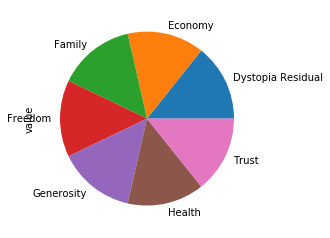

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

pv_melt.plot(kind='pie', y='value',legend=False)
plt.show()

### 1.9 Next Steps

In this lesson, we learned how to transform data using the **Series.map()**, **Series.apply()**, **DataFrame.apply()**, and **DataFrame.applymap()** methods along with the **pd.melt()** function. Below is a summary chart of the differences between the **map()**, **apply()**, and **applymap()** methods:

| Method  | Series or Dataframe Method | Applies Functions Element-wise? |
|----------|----------------------------|-------------------------------------|
| Map | Series | Yes |
| Apply | Series | Yes |
| Applymap | Dataframe | Yes |
| Apply | Dataframe | No, applies functions along an axis |

As you explore pandas, you'll also find that pandas has a method to **"un-melt"** the data, or **transform rows into columns**. This method is called the [df.pivot()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot.html) method, not to be confused with the **df.pivot_table()** method used to aggregate data. Alhtough we couldn't cover the **df.pivot()** method explicitly in this lesson, we encourage you to explore it on your own.

In the next lesson, we'll learn how to manipulate strings in pandas as we continue building on what we've learned so far.

